In [81]:
import os
import sys
from logging import handlers
from pathlib import Path
import logging
import time
import numpy as np
import pandas as pd 
import math
import random 

In [82]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, CuDNNLSTM, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

from os import path

#%matplotlib inline 
import matplotlib.pyplot as plt

In [83]:
test = pd.read_csv('/Users/kruttikajain/Documents/test.csv')
train = pd.read_csv('/Users/kruttikajain/Documents/train.csv')

In [84]:
#train.info()

In [85]:
#test.info()

In [86]:
df_combine = [train,test]
total_data = pd.concat(df_combine,ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [87]:
total_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [88]:
total_data=train.drop(columns=['PassengerId', 'Name','Ticket','Cabin'])


In [89]:
total_data.loc[pd.isnull(total_data['Embarked'])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [90]:
total_data['Fare'].fillna(total_data['Fare'].mean(), inplace = True)

In [91]:
total_data['Age'].fillna(total_data['Age'].mean(), inplace = True)

In [92]:
total_data= total_data[total_data['Embarked'].notna()]

In [93]:
total_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [94]:
categorical=['Pclass','Sex','SibSp','Parch','Embarked']

In [95]:
from sklearn.preprocessing import LabelEncoder
def CategoricalToNum(catVal):
    le = LabelEncoder()
    le.fit(catVal)
    catVal = le.transform(catVal)
    return catVal

In [96]:
for i in categorical:
    total_data[i] = CategoricalToNum(total_data[i])

In [102]:
A_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(total_data[Xcols])
X = scaler.transform(total_data[A_cols])

In [65]:
len(y_val)

889

In [66]:
len(total_data)

889

In [104]:
new_ytrain=total_data[0:891]['Survived'].values
#print(new_ytrain)

In [105]:
new_xtrain=total_data[0:891].drop(['Survived'], axis=1).values
#new_xtrain.shape

In [106]:

from keras import layers
from keras import models

model2 = models.Sequential()
model2.add(layers.Dense(24, activation='relu', input_dim=7))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                192       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [107]:
model2.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [109]:
start_time = time.time()
history2 = model2.fit(new_xtrain, new_ytrain, validation_split=0.3, epochs=50, batch_size=10)
time.time() - start_time

Train on 622 samples, validate on 267 samples
Epoch 1/50
622/622 [==============================] - 0s 186us/step - loss: 0.5304 - accuracy: 0.7476 - val_loss: 0.5097 - val_accuracy: 0.7341
Epoch 2/50
622/622 [==============================] - 0s 206us/step - loss: 0.5179 - accuracy: 0.7637 - val_loss: 0.4519 - val_accuracy: 0.7753
Epoch 3/50
622/622 [==============================] - 0s 232us/step - loss: 0.5225 - accuracy: 0.7621 - val_loss: 0.5813 - val_accuracy: 0.7079
Epoch 4/50
622/622 [==============================] - 0s 197us/step - loss: 0.5138 - accuracy: 0.7605 - val_loss: 0.4601 - val_accuracy: 0.8015
Epoch 5/50
622/622 [==============================] - 0s 181us/step - loss: 0.5089 - accuracy: 0.7605 - val_loss: 0.4590 - val_accuracy: 0.8015
Epoch 6/50
622/622 [==============================] - 0s 185us/step - loss: 0.5072 - accuracy: 0.7685 - val_loss: 0.4637 - val_accuracy: 0.7828
Epoch 7/50
622/622 [==============================] - 0s 180us/step - loss: 0.5130 - accur

6.929561138153076

#Python Training time 
200: 28.765006065368652
100: 12.841667175292969
90: 11.866291046142578
80: 10.412339925765991
70: 8.76948094367981
60: 7.626959323883057
50: 6.44500207901001
40: 5.283983945846558
30: 4.256049871444702
20: 2.5748798847198486
10: 1.2444090843200684




#R Training time
100:  2.344   3.222  32.625 
90:  19.498   2.014  26.688 
80: 17.334   1.904  24.222 
70: 15.788   1.963  22.266 
60: 13.076   1.529  18.204
50: 10.680   1.081  14.761 
40: 9.264   0.888  12.933 
30:  6.492   0.724   9.263 
20: 4.357   0.436   6.284 
10: 2.245   0.224   3.392

In [72]:
Py_times=[1.244,2.574,4.256, 5.283,6.445, 7.626, 8.769, 10.412, 11.866, 12.841]
R_times=[3.392,6.284, 9.263, 12.933, 14.761,18.204, 22.266, 24.222, 26.688, 32.625 ]

In [73]:
epochs_=[10,20,30,40,50,60,70,80,90,100]

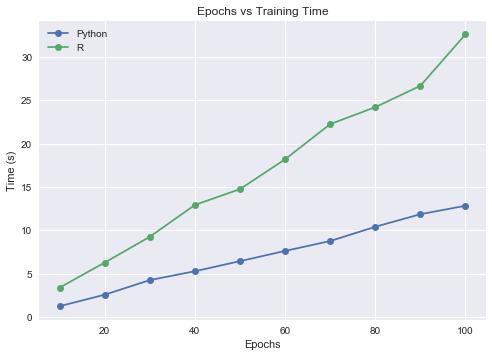

In [79]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
plt.plot(epochs_, Py_times, '-o', label='Python')
plt.plot(epochs_, R_times, '-o',label='R' )
plt.title('Epochs vs Training Time')
plt.ylabel('Time (s)')
plt.xlabel('Epochs')
plt.legend()
plt.show()

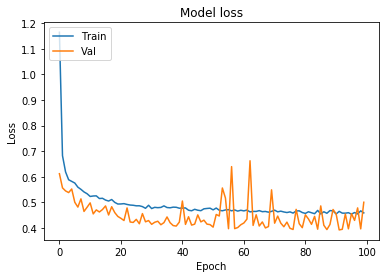

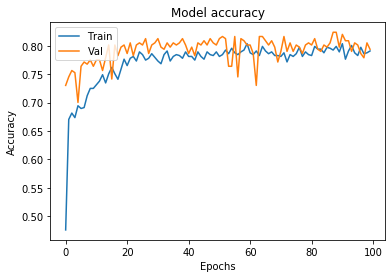

In [77]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()



plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

